# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high= 180.00, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=075206588cbeb1e9c9de2ca682da9ea4


In [5]:

# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
     # Run an API request for each of the cities
    try:
    
    
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

    
    
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
        

    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
               

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | sechura
Processing Record 4 of Set 1 | byron bay
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 8 of Set 1 | kushima
Processing Record 9 of Set 1 | juba
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | zaliztsi
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | la ronge
Processing Record 15 of Set 1 | necochea
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | santa cruz
Processing Record 18 of Set 1 | esna
Processing Record 19 of Set 1 |

Processing Record 15 of Set 4 | taolanaro
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 16 of Set 4 | umzimvubu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 17 of Set 4 | punto fijo
Processing Record 18 of Set 4 | nizhneivkino
Processing Record 19 of Set 4 | kupang
Processing Record 20 of Set 4 | moses lake
Processing Record 21 of Set 4 | avarua
Processing Record 22 of Set 4 | arawa
Processing Record 23 of Set 4 | barra
Processing Record 24 of Set 4 | iqaluit
Processing Record 25 of Set 4 | kurumkan
Processing Record 26 of Set 4 | pesaro
Processing Record 27 of Set 4 | kirishi
Processing Record 28 of Set 4 | sandavagur
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 29 of Set 4 | guerrero negro
Processing Record 30 of Set 4 | zeya
Processing Record 31 of Set 4 | kisangani

Processing Record 36 of Set 7 | kargil
Processing Record 37 of Set 7 | marrakesh
Processing Record 38 of Set 7 | tabiauea
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 39 of Set 7 | doha
Processing Record 40 of Set 7 | san blas
Processing Record 41 of Set 7 | lagoa
Processing Record 42 of Set 7 | karkaralinsk
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 43 of Set 7 | killybegs
Processing Record 44 of Set 7 | waingapu
Processing Record 45 of Set 7 | nago
Processing Record 46 of Set 7 | haines junction
Processing Record 47 of Set 7 | jiayuguan
Processing Record 48 of Set 7 | shu
Processing Record 49 of Set 7 | bengkulu
Processing Record 0 of Set 8 | kondinskoye
Processing Record 1 of Set 8 | benatky nad jizerou
Processing Record 2 of Set 8 | grimshaw
Processing Record 3 of Set 8 | stara zagora
Processing Record 4 of Set 8 | pasibi
City not fou

Processing Record 45 of Set 10 | kloulklubed
Processing Record 46 of Set 10 | nelson bay
Processing Record 47 of Set 10 | maldonado
Processing Record 48 of Set 10 | tigil
Processing Record 49 of Set 10 | khani
Processing Record 0 of Set 11 | nikolskoye-na-cheremshane
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 1 of Set 11 | san patricio
Processing Record 2 of Set 11 | kosa
Processing Record 3 of Set 11 | ayacucho
Processing Record 4 of Set 11 | san ramon
Processing Record 5 of Set 11 | klyuchi
Processing Record 6 of Set 11 | wulanhaote
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 7 of Set 11 | rosarito
Processing Record 8 of Set 11 | esso
Processing Record 9 of Set 11 | eskasem
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 10 of Set 11 | norman wells
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv("WeatherPy.csv", encoding= "utf-8",index=False)

city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Windspeed     578
Country       578
Date          578
dtype: int64

In [7]:
# Display the city Data Frame
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,hobart,-42.8794,147.3294,47.05,64,20,18.41,AU,1662893036
1,sechura,-5.5569,-80.8222,60.21,91,60,9.91,PE,1662893126
2,byron bay,-28.6500,153.6167,60.94,73,94,7.83,AU,1662892550
3,fort nelson,58.8053,-122.7002,35.19,87,40,0.00,CA,1662893000
4,tautira,-17.7333,-149.1500,77.52,73,5,16.35,PF,1662892880
5,kushima,31.4583,131.2333,77.45,90,62,7.94,JP,1662893007
6,juba,4.8517,31.5825,86.47,52,65,5.06,SS,1662893191
7,bethel,41.3712,-73.4140,67.62,85,0,0.00,US,1662893192
8,new norfolk,-42.7826,147.0587,46.71,77,48,5.99,AU,1662893176
9,zaliztsi,49.7919,25.3730,61.18,69,72,15.01,UA,1662893193


# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

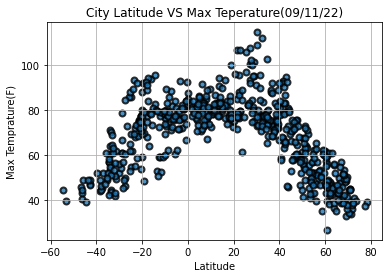

In [11]:
#Scatter plot for Latitude VS Tempratrure

plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidth=2, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude VS Max Teperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temprature(F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()



## Latitude vs. Humidity Plot

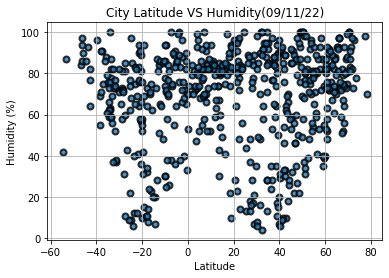

In [12]:
#Scatter plot for Latitude VS Humidity

plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidth=2, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude VS Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()


## Latitude vs. Cloudiness Plot

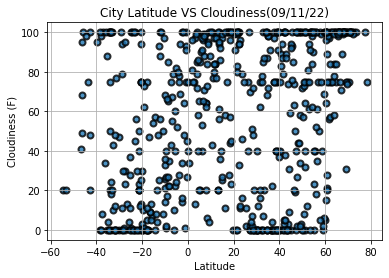

In [13]:
#Scatter plot for Latitude VS Cloudiness

plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidth=2, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude VS Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()


## Latitude vs. Wind Speed Plot

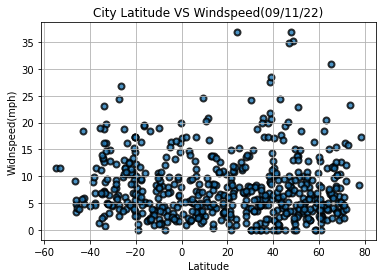

In [16]:
#Scatter plot for Latitude VS Windspeed

plt.scatter(city_data_df["Lat"],
            city_data_df["Windspeed"],
            edgecolor="black", linewidth=2, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude VS Windspeed(%s)" % time.strftime("%x"))
plt.ylabel("Widnspeed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()


## Linear Regression

In [17]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

The r-squared is: -0.7773810791565102


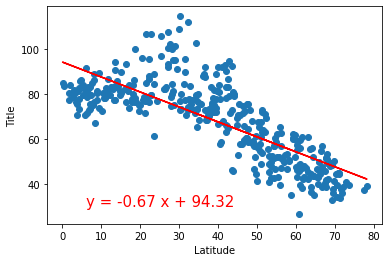

In [20]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6992070319796246


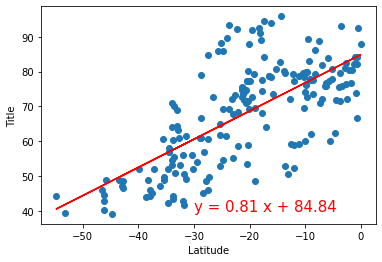

In [21]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.051403577438191066


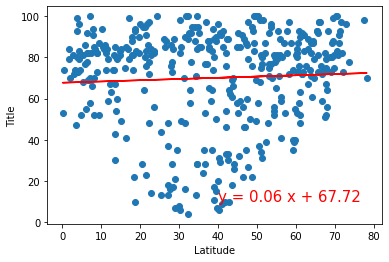

In [22]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06419034409010185


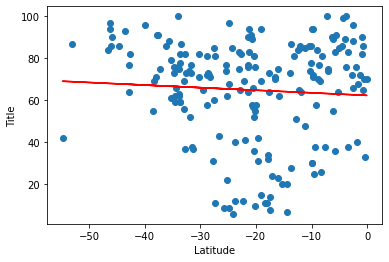

In [23]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12666747581674268


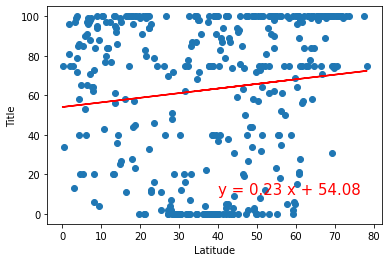

In [24]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0065145377356710926


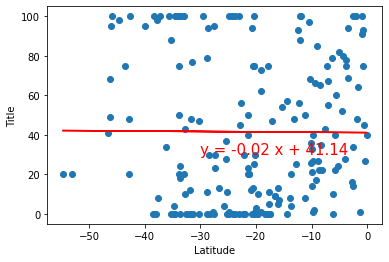

In [26]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02986389369835261


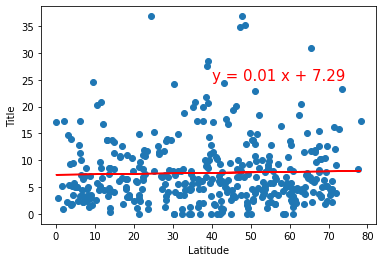

In [27]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1228718549015422


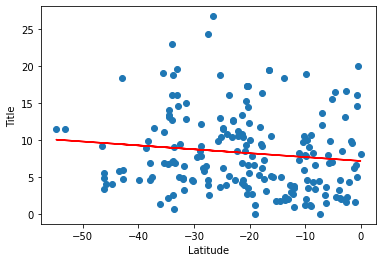

In [28]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))